LINEAR REGRESSION

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Initialize the model
    model = LinearRegression()

    # Define K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Metrics storage
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # Display metrics for the current fold in a single line
        print(f"Fold {fold}: MAE={mae:.8f}, MSE={mse:.8f}, RMSE={rmse:.8f}, R^2={r2:.8f}")

    # Display average metrics across all folds
    print("\nAverage Metrics:")
    print(f"  Mean MAE: {np.mean(mae_scores):.8f}")
    print(f"  Mean MSE: {np.mean(mse_scores):.8f}")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.8f}")
    print(f"  Mean R^2: {np.mean(r2_scores):.8f}\n")

    # Example predictions with comparison
    print("Example Predictions:")
    example_index = np.random.choice(len(X), 5, replace=False)
    example_data = X.iloc[example_index]
    example_true_values = y.iloc[example_index].values
    example_predictions = model.predict(example_data)

    for i, idx in enumerate(example_index):
        predicted_value = round(example_predictions[i])
        is_correct = predicted_value == example_true_values[i]
        print(f"  Data {i+1}: {X.iloc[idx].to_dict()}, True OSA: {example_true_values[i]}, Predicted OSA: {predicted_value}, Correct: {is_correct}")

else:
    print("The required columns are not present in the DataFrame.")

Fold 1: MAE=0.44952747, MSE=0.22928259, RMSE=0.47883462, R^2=0.08144587
Fold 2: MAE=0.41054409, MSE=0.19288748, RMSE=0.43918958, R^2=0.22725230
Fold 3: MAE=0.42664116, MSE=0.20950227, RMSE=0.45771418, R^2=0.15565662
Fold 4: MAE=0.42599354, MSE=0.21748204, RMSE=0.46634970, R^2=0.12958615
Fold 5: MAE=0.44093398, MSE=0.22756999, RMSE=0.47704297, R^2=0.08830690

Average Metrics:
  Mean MAE: 0.43072805
  Mean MSE: 0.21534488
  Mean RMSE: 0.46382621
  Mean R^2: 0.13644957

Example Predictions:
  Data 1: {'Cervical': 45.0, 'BMI': 27.68166089965398}, True OSA: 0, Predicted OSA: 1, Correct: False
  Data 2: {'Cervical': 45.0, 'BMI': 28.07504293830096}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 3: {'Cervical': 43.0, 'BMI': 26.82742078020452}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 4: {'Cervical': 45.0, 'BMI': 32.95068027210885}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 5: {'Cervical': 41.0, 'BMI': 43.00893911283521}, True OSA: 1, Predicted OSA: 1, Correct: True


RIDGE REGRESSION

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Standardize the features to enhance variability and stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Ridge regression model with a larger alpha value
    model = Ridge(alpha=10.0)

    # Define K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Metrics storage
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # Display metrics for the current fold in a single line
        print(f"Fold {fold}: MAE={mae:.8f}, MSE={mse:.8f}, RMSE={rmse:.8f}, R^2={r2:.8f}")

    # Display average metrics across all folds
    print("\nAverage Metrics:")
    print(f"  Mean MAE: {np.mean(mae_scores):.8f}")
    print(f"  Mean MSE: {np.mean(mse_scores):.8f}")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.8f}")
    print(f"  Mean R^2: {np.mean(r2_scores):.8f}\n")

    # Example predictions with comparison
    print("Example Predictions:")
    example_index = np.random.choice(len(X_scaled), 5, replace=False)
    example_data = X_scaled[example_index]
    example_true_values = y.iloc[example_index].values
    example_predictions = model.predict(example_data)

    for i, idx in enumerate(example_index):
        predicted_value = round(example_predictions[i])
        is_correct = predicted_value == example_true_values[i]
        print(f"  Data {i+1}: Features: {X.iloc[idx].to_dict()}, True OSA: {example_true_values[i]}, Predicted OSA: {predicted_value}, Correct: {is_correct}")

else:
    print("The required columns are not present in the DataFrame.")


Fold 1: MAE=0.45016203, MSE=0.22911690, RMSE=0.47866158, R^2=0.08210965
Fold 2: MAE=0.41192454, MSE=0.19336987, RMSE=0.43973841, R^2=0.22531978
Fold 3: MAE=0.42767158, MSE=0.20961747, RMSE=0.45784000, R^2=0.15519236
Fold 4: MAE=0.42669970, MSE=0.21722990, RMSE=0.46607928, R^2=0.13059529
Fold 5: MAE=0.44159961, MSE=0.22731799, RMSE=0.47677877, R^2=0.08931647

Average Metrics:
  Mean MAE: 0.43161149
  Mean MSE: 0.21533043
  Mean RMSE: 0.46381961
  Mean R^2: 0.13650671

Example Predictions:
  Data 1: Features: {'Cervical': 45.0, 'BMI': 28.73467205720204}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 2: Features: {'Cervical': 40.0, 'BMI': 29.75778546712803}, True OSA: 0, Predicted OSA: 0, Correct: True
  Data 3: Features: {'Cervical': 43.0, 'BMI': 26.23355580417422}, True OSA: 0, Predicted OSA: 1, Correct: False
  Data 4: Features: {'Cervical': 40.0, 'BMI': 34.89439853076217}, True OSA: 0, Predicted OSA: 1, Correct: False
  Data 5: Features: {'Cervical': 41.0, 'BMI': 31.561671506122

LASSO REGRESSION

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Standardize the features to enhance variability and stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Lasso regression model with a moderate alpha value
    model = Lasso(alpha=0.1, max_iter=10000)

    # Define K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Metrics storage
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # Display metrics for the current fold in a single line
        print(f"Fold {fold}: MAE={mae:.8f}, MSE={mse:.8f}, RMSE={rmse:.8f}, R^2={r2:.8f}")

    # Display average metrics across all folds
    print("\nAverage Metrics:")
    print(f"  Mean MAE: {np.mean(mae_scores):.8f}")
    print(f"  Mean MSE: {np.mean(mse_scores):.8f}")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.8f}")
    print(f"  Mean R^2: {np.mean(r2_scores):.8f}\n")

    # Example predictions with comparison
    print("Example Predictions:")
    example_index = np.random.choice(len(X_scaled), 5, replace=False)
    example_data = X_scaled[example_index]
    example_true_values = y.iloc[example_index].values
    example_predictions = model.predict(example_data)

    for i, idx in enumerate(example_index):
        predicted_value = round(example_predictions[i])
        is_correct = predicted_value == example_true_values[i]
        print(f"  Data {i+1}: Features: {X.iloc[idx].to_dict()}, True OSA: {example_true_values[i]}, Predicted OSA: {predicted_value}, Correct: {is_correct}")

else:
    print("The required columns are not present in the DataFrame.")


Fold 1: MAE=0.47576766, MSE=0.23319293, RMSE=0.48290053, R^2=0.06578025
Fold 2: MAE=0.46532749, MSE=0.22002844, RMSE=0.46907190, R^2=0.11851992
Fold 3: MAE=0.46927632, MSE=0.22527658, RMSE=0.47463310, R^2=0.09208247
Fold 4: MAE=0.46769033, MSE=0.22634470, RMSE=0.47575697, R^2=0.09411572
Fold 5: MAE=0.47202082, MSE=0.23088806, RMSE=0.48050813, R^2=0.07501403

Average Metrics:
  Mean MAE: 0.47001652
  Mean MSE: 0.22714614
  Mean RMSE: 0.47657413
  Mean R^2: 0.08910248

Example Predictions:
  Data 1: Features: {'Cervical': 41.0, 'BMI': 22.87740570219337}, True OSA: 0, Predicted OSA: 0, Correct: True
  Data 2: Features: {'Cervical': 39.0, 'BMI': 31.91222345727707}, True OSA: 1, Predicted OSA: 0, Correct: False
  Data 3: Features: {'Cervical': 44.0, 'BMI': 35.43667123914037}, True OSA: 0, Predicted OSA: 1, Correct: False
  Data 4: Features: {'Cervical': 44.0, 'BMI': 31.3535787870644}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 5: Features: {'Cervical': 37.0, 'BMI': 41.5331672006645

DECISION TREE REGRESSION

Fold 1: MAE=0.44057680, MSE=0.24097509, RMSE=0.49089214, R^2=0.03460327
Fold 2: MAE=0.40469869, MSE=0.20298998, RMSE=0.45054409, R^2=0.18677959
Fold 3: MAE=0.42386003, MSE=0.22522197, RMSE=0.47457557, R^2=0.09230257
Fold 4: MAE=0.43916602, MSE=0.23368958, RMSE=0.48341450, R^2=0.06471980
Fold 5: MAE=0.43365999, MSE=0.22528258, RMSE=0.47463942, R^2=0.09747075

Average Metrics:
  Mean MAE: 0.42839230
  Mean MSE: 0.22563184
  Mean RMSE: 0.47481314
  Mean R^2: 0.09517519

Example Predictions:
  Data 1: Features: {'Cervical': 38.0, 'BMI': 25.24933720489837}, True OSA: 0, Predicted OSA: 0, Correct: True
  Data 2: Features: {'Cervical': 44.0, 'BMI': 32.0}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 3: Features: {'Cervical': 42.0, 'BMI': 24.30248705971468}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 4: Features: {'Cervical': 40.0, 'BMI': 29.35235450069436}, True OSA: 1, Predicted OSA: 0, Correct: False
  Data 5: Features: {'Cervical': 36.0, 'BMI': 23.83673469387755}, True OSA:

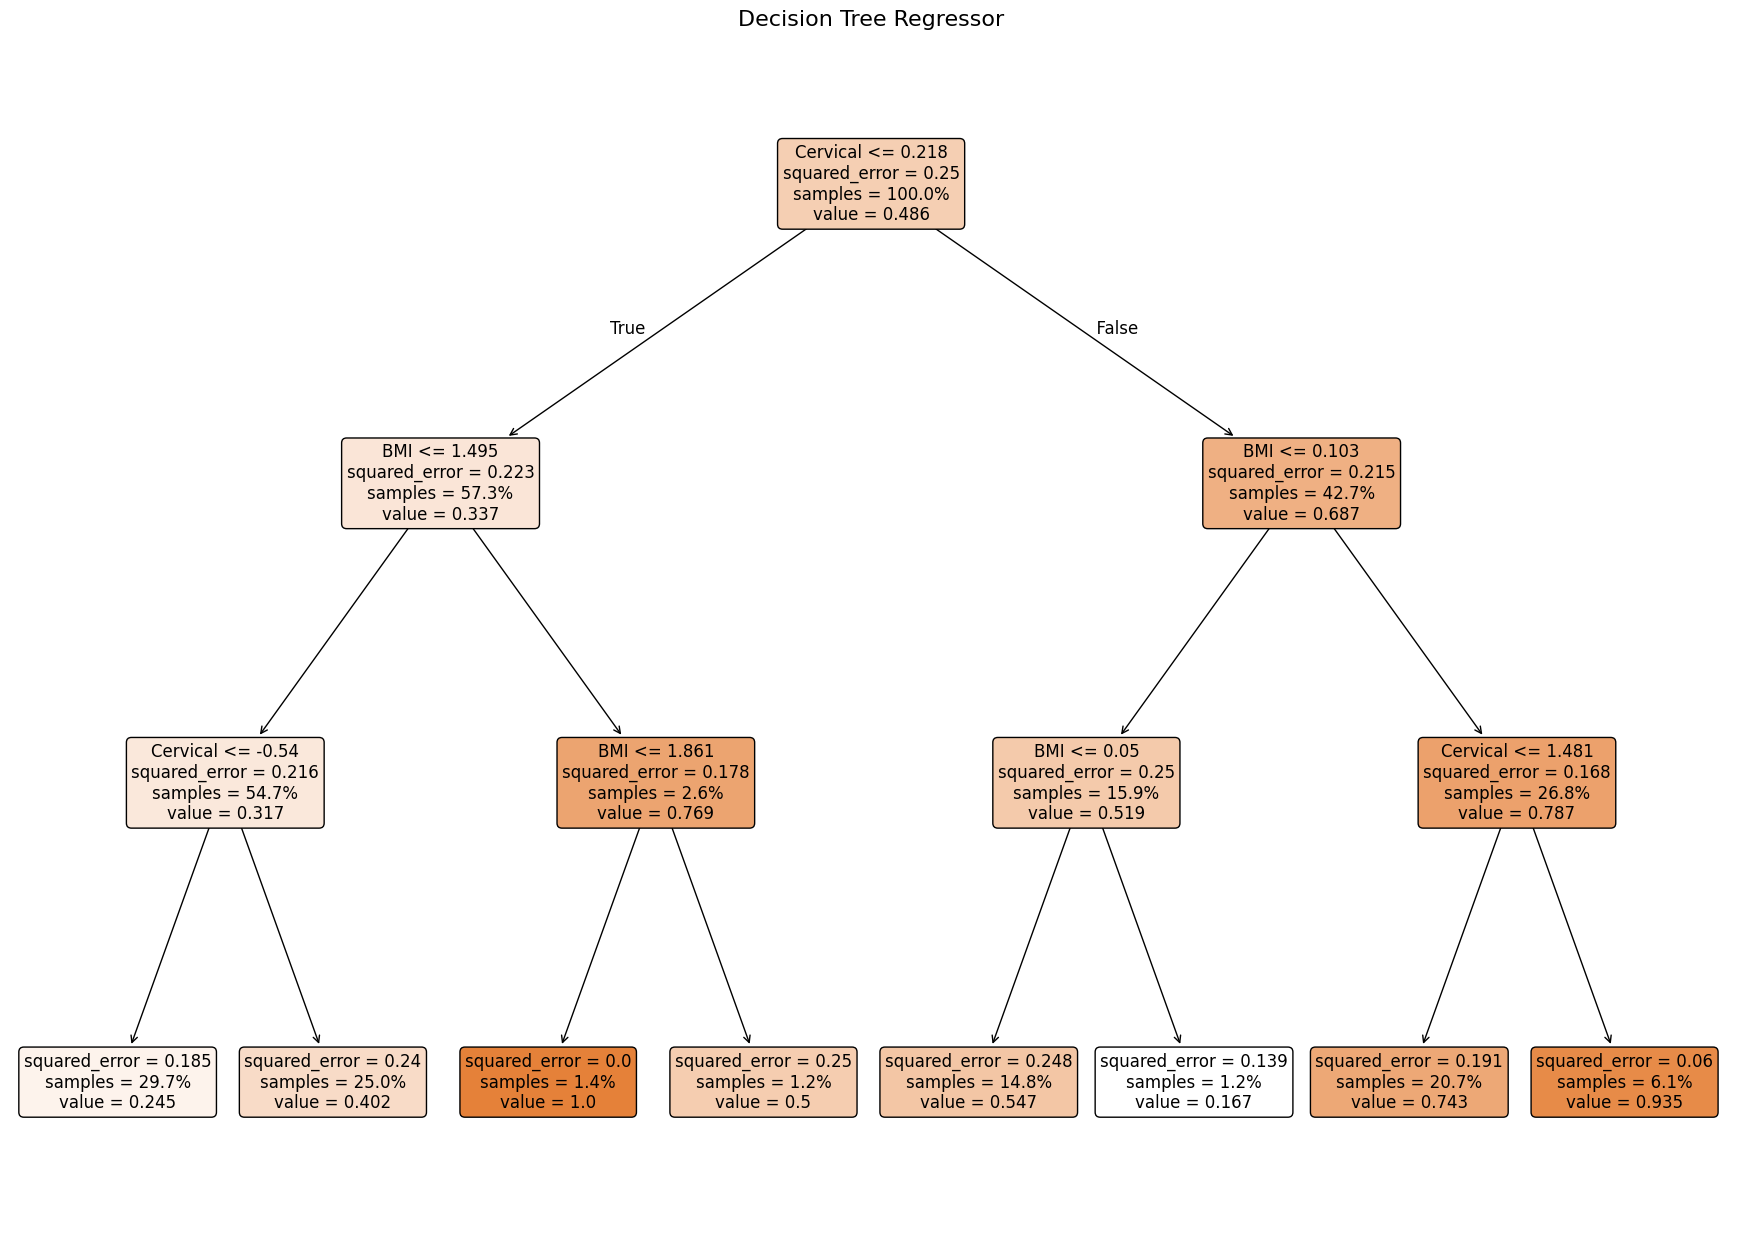

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Standardize the features to enhance variability and stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Decision Tree Regressor model
    model = DecisionTreeRegressor(max_depth=3, random_state=42)

    # Define K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Metrics storage
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # Display metrics for the current fold in a single line
        print(f"Fold {fold}: MAE={mae:.8f}, MSE={mse:.8f}, RMSE={rmse:.8f}, R^2={r2:.8f}")

    # Display average metrics across all folds
    print("\nAverage Metrics:")
    print(f"  Mean MAE: {np.mean(mae_scores):.8f}")
    print(f"  Mean MSE: {np.mean(mse_scores):.8f}")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.8f}")
    print(f"  Mean R^2: {np.mean(r2_scores):.8f}\n")

    # Example predictions with comparison
    print("Example Predictions:")
    example_index = np.random.choice(len(X_scaled), 5, replace=False)
    example_data = X_scaled[example_index]
    example_true_values = y.iloc[example_index].values
    example_predictions = model.predict(example_data)

    for i, idx in enumerate(example_index):
        predicted_value = round(example_predictions[i])
        is_correct = predicted_value == example_true_values[i]
        print(f"  Data {i+1}: Features: {X.iloc[idx].to_dict()}, True OSA: {example_true_values[i]}, Predicted OSA: {predicted_value}, Correct: {is_correct}")

    # Visualize the Decision Tree
    plt.figure(figsize=(20, 15))
    plot_tree(
        model, 
        feature_names=['Cervical', 'BMI'], 
        filled=True, 
        rounded=True, 
        fontsize=12, 
        impurity=True,
        proportion=True
    )

    plt.gcf().set_facecolor('white')
    plt.title('Decision Tree Regressor', fontsize=16, color='black')
    plt.tight_layout(pad=10.0)
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")


NEAREST NEIGHBOURS (KNN)

Best Parameters: {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Fold 1: MAE=0.42044638, MSE=0.25350543, RMSE=0.50349322, R^2=-0.01559588
Fold 2: MAE=0.38119062, MSE=0.21783588, RMSE=0.46672891, R^2=0.12730380
Fold 3: MAE=0.40794951, MSE=0.25579167, RMSE=0.50575850, R^2=-0.03090049
Fold 4: MAE=0.41049651, MSE=0.25334614, RMSE=0.50333502, R^2=-0.01395034
Fold 5: MAE=0.40839773, MSE=0.24669487, RMSE=0.49668387, R^2=0.01168865

Average Metrics:
  Mean MAE: 0.40569615
  Mean MSE: 0.24543480
  Mean RMSE: 0.49519991
  Mean R^2: 0.01570915

Example Predictions:
  Data 1: Features: {'Cervical': 42.0, 'BMI': 33.56401384083046}, True OSA: 0, Predicted OSA: 0, Correct: True
  Data 2: Features: {'Cervical': 47.0, 'BMI': 34.83814777181014}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 3: Features: {'Cervical': 48.0, 'BMI': 30.8641975308642}, True OSA: 1, Predicted OSA: 1, Correct: True
  Data 4: Features: {'Cervical': 40.0, 'BMI': 31.24999999999999}, True OSA: 0, Predicted OSA: 0, Correct

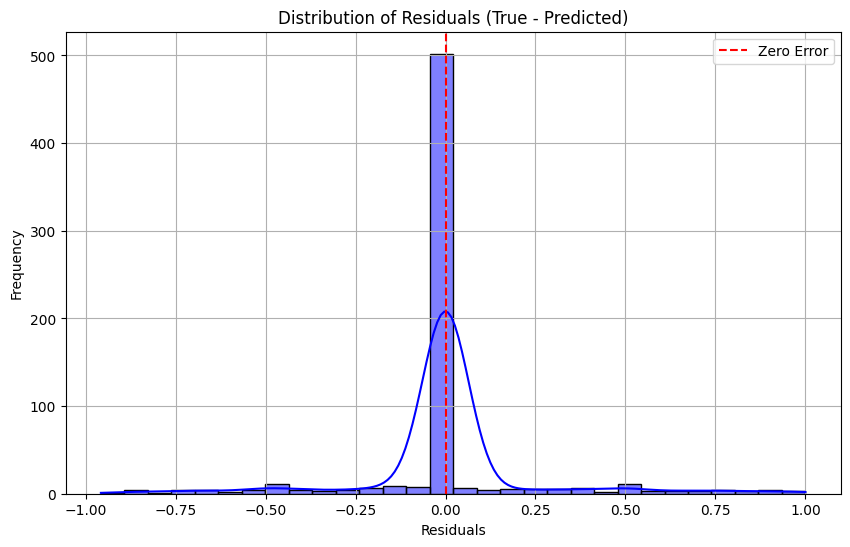

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Standardize the features to enhance variability and stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Remove any NaN or infinite values to avoid RuntimeWarnings
    X_scaled = np.nan_to_num(X_scaled)

    # Define K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define KNeighborsRegressor and updated parameter grid for better performance
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [2, 3, 5, 10, 15, 20],  # Explore fewer neighbors to capture local patterns better
        'weights': ['distance'],  # Use weighted distances for improved accuracy
        'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled, y)

    # Retrieve the best model and parameters
    best_knn = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)

    # Metrics storage
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold cross-validation with the best model
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the best model
        best_knn.fit(X_train, y_train)

        # Make predictions
        y_pred = best_knn.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # Display metrics for the current fold in a single line
        print(f"Fold {fold}: MAE={mae:.8f}, MSE={mse:.8f}, RMSE={rmse:.8f}, R^2={r2:.8f}")

    # Display average metrics across all folds
    print("\nAverage Metrics:")
    print(f"  Mean MAE: {np.mean(mae_scores):.8f}")
    print(f"  Mean MSE: {np.mean(mse_scores):.8f}")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.8f}")
    print(f"  Mean R^2: {np.mean(r2_scores):.8f}\n")

    # Example predictions with comparison
    print("Example Predictions:")
    example_index = np.random.choice(len(X_scaled), 5, replace=False)
    example_data = X_scaled[example_index]
    example_true_values = y.iloc[example_index].values
    example_predictions = best_knn.predict(example_data)

    for i, idx in enumerate(example_index):
        predicted_value = round(example_predictions[i])
        is_correct = predicted_value == example_true_values[i]
        print(f"  Data {i+1}: Features: {X.iloc[idx].to_dict()}, True OSA: {example_true_values[i]}, Predicted OSA: {predicted_value}, Correct: {is_correct}")

    # Plot residuals (errors)
    y_pred_all = best_knn.predict(X_scaled)
    residuals = y - y_pred_all

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color="blue", bins=30)
    plt.axvline(0, color="red", linestyle="--", label="Zero Error")
    plt.title("Distribution of Residuals (True - Predicted)")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")
